# Project: Wine Quality Test

In [87]:
import numpy as np
import pandas as pd

import seaborn as sns

In [88]:
wine_red = pd.DataFrame(pd.read_csv('winequality-red.csv',sep = ';'))

In [89]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
print('Red wine shape: ', wine_red.shape)

Red wine shape:  (1599, 12)


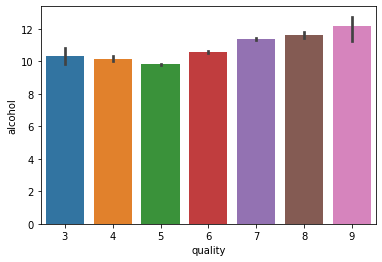

In [91]:
sns.barplot(x = 'quality',y = 'alcohol', data = wine_white)

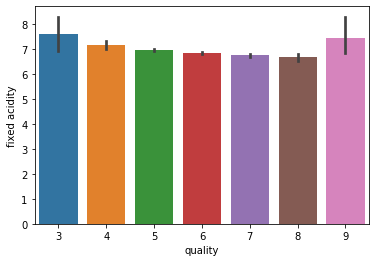

In [92]:
sns.barplot(x = 'quality',y = 'fixed acidity', data = wine_white)

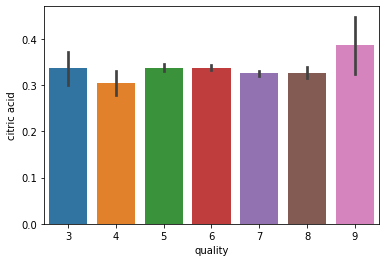

In [93]:
sns.barplot(x = 'quality',y = 'citric acid', data = wine_white)

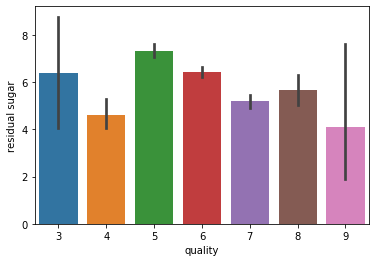

In [94]:
sns.barplot(x = 'quality',y = 'residual sugar', data = wine_white)

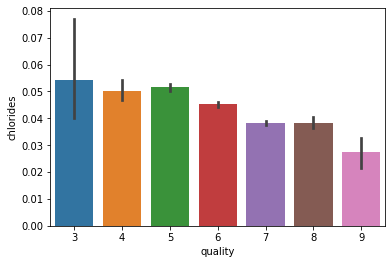

In [95]:
sns.barplot(x = 'quality',y = 'chlorides', data = wine_white)

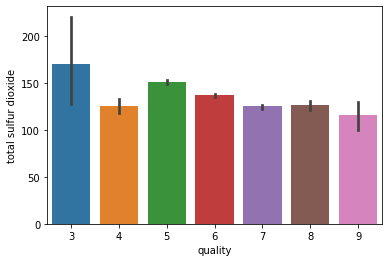

In [96]:
sns.barplot(x = 'quality',y = 'total sulfur dioxide', data = wine_white)

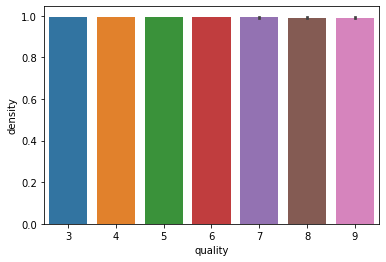

In [97]:
sns.barplot(x = 'quality',y = 'density', data = wine_white)

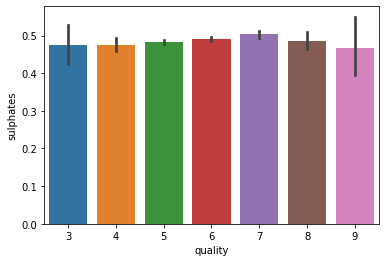

In [98]:
sns.barplot(x = 'quality',y = 'sulphates', data = wine_white)

In [99]:
bins = [1,6.5,10]
labels = ['Bad', 'Good']
wine_red['quality'] = pd.cut(wine_red['quality'], bins = bins, labels = labels)

In [100]:
wine_red['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

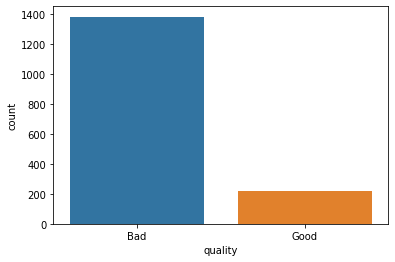

In [101]:
sns.countplot(wine_red['quality'])

In [102]:
wine_red['quality'].replace({'Bad':0,'Good':1},inplace = True)
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [103]:
x = wine_red.drop(['quality'], axis = 1)
y = wine_red['quality']

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [106]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression model: ',lr_acc* 100)

Accuracy of Logistic Regression model:  87.5


In [108]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [109]:
nb_acc = accuracy_score(y_test, y_pred)
print('Accuracy of GaussianNB: ',nb_acc*100)

Accuracy of GaussianNB:  85.3125


In [110]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)

In [111]:
accuracy_score(y_test, y_pred)

0.85

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [113]:
accuracy_score(y_test, y_pred)

0.83125

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [116]:
accuracy_score(y_test, y_pred)

0.875

In [119]:
from sklearn.svm import SVC
svc = SVC(C = 2, gamma = 1, kernel = 'rbf')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [120]:
accuracy_score(y_test, y_pred)

0.9125